In [2]:
import scanpy as sc,os,pickle,sys,copy,scvelo as scv
import scanpy.external as sce,pandas as pd, numpy as np

# update columns in .obs

In [2]:
with open("./200608-ABM2-totalclustered.pk",'rb') as f:
    adata = pickle.load(f)

In [3]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3',
       'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet',
       'pANN', 'pred.immgen.fine', 'pred.immgen.finepruned',
       'pred.immgen.main', 'pred.immgen.mainpruned', 'RNA_snn_res.0.6',
       'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'n_genes',
       'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'leiden1.5',
       'leiden1.2', 'leiden0.9', 'leiden0.8', 'leiden0.7', 'leiden0.6',
       'leiden0.5', 'leiden0.4', 'leiden0.3', 'leiden0.2', 'leiden0.1',
       'ann0409', 'ann0608'],
      dtype='object')

In [4]:
adata.obs= adata.obs.drop(
    labels=['RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3',
            'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6',
            'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 
            'leiden1.2', 'leiden0.9', 'leiden0.8', 'leiden0.7', 'leiden0.6',
            'leiden0.5', 'leiden0.4', 'leiden0.3', 'leiden0.2', 'leiden0.1',
            'n_genes','cell_cycle_diff', 'leiden1.5','ann0409'],
    axis=1)

In [5]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'seurat_clusters', 'doublet', 'pANN', 'pred.immgen.fine',
       'pred.immgen.finepruned', 'pred.immgen.main', 'pred.immgen.mainpruned',
       'S_score', 'G2M_score', 'phase', 'ann0608'],
      dtype='object')

In [6]:
del adata.uns['log1p']
del adata.uns['leiden0.1_colors']
del adata.uns['leiden0.2_colors']
del adata.uns['leiden0.3_colors']
del adata.uns['leiden0.4_colors']
del adata.uns['leiden0.5_colors']
del adata.uns['leiden0.6_colors']
del adata.uns['leiden0.7_colors']
del adata.uns['leiden0.8_colors']
del adata.uns['leiden0.9_colors']
del adata.uns['leiden1.2_colors']
del adata.uns['leiden1.5_colors']
del adata.uns['ann0409_colors']
del adata.uns['ann0409_deg']
del adata.uns['ann0409_degdf']
del adata.uns['dendrogram_ann0409']
del adata.uns['RNA_snn_res.0.1_colors']
del adata.uns['RNA_snn_res.0.3_colors']
del adata.uns['RNA_snn_res.0.5_colors']

del adata.obs['seurat_clusters']
del adata.obs['doublet']
del adata.obs['pred.immgen.fine']
del adata.obs['pred.immgen.main']
del adata.obs['orig.ident']

In [128]:
adata.obs.nCount_RNA=adata.obs.nCount_RNA.astype(np.int32)
adata.obs.nFeature_RNA=adata.obs.nFeature_RNA.astype(np.int32)
adata.obs['percent.mt']=adata.obs['percent.mt'].astype(np.float32)
adata.obs.pANN=adata.obs.pANN.astype(np.float32)

In [131]:
adata= adata.copy()

/home/csj/anaconda3/envs/r411py37/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/csj/anaconda3/envs/r411py37/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [7]:
adata

AnnData object with n_obs × n_vars = 3442 × 14521
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'pred.immgen.finepruned', 'pred.immgen.mainpruned', 'S_score', 'G2M_score', 'phase', 'ann0608'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'phase_colors', 'ann0608_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts_dca', 'counts', 'normalized', 'scaled', 'normalized_dca', 'scaled_dca'

In [206]:
adata.X = copy.copy(adata.layers['normalized'])

import numpy as np
from scipy.sparse import csc_matrix
adata.X = csc_matrix(adata.X, dtype=np.float32)


In [209]:
adata_imputed = sce.pp.magic(adata, name_list='all_genes', knn=5, n_jobs=20,n_pca=50, verbose=True, copy=True)


Calculating MAGIC...
  Running MAGIC on 3442 cells and 14521 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 5.03 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.65 seconds.
    Calculating affinities...
    Calculated affinities in 0.63 seconds.
  Calculated graph and diffusion operator in 6.32 seconds.
  Running MAGIC with `solver='exact'` on 14521-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 1.91 seconds.
Calculated MAGIC in 8.66 seconds.


In [215]:
adata.layers['normalized_magic']= copy.copy(adata_imputed.X.copy())

# construct a velocity loom

In [190]:
# load loom file
filename="/home/csj/mywork/ilc/210618-velo/velocyto_looms/ABMaLP2.loom"
ldata = scv.read(filename, cache=True)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [191]:
# rename barcodes
ldata.obs_names=[ss[8:-1] for ss in ldata.obs_names.tolist()]
# reorder loom cells as in adata
ldata=ldata[adata.obs_names].copy()


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [192]:
# label transfer
ldata.obsm["X_umap"]=adata.obsm["X_umap"]
ldata.obsm["X_pca"] =adata.obsm["X_pca"]
ldata.obs=ldata.obs.drop(["_X","_Y"],axis=1)
ldata.obs['ann0608']= adata.obs["ann0608"]
ldata.obs['phase']=adata.obs['phase']
ldata.obs.Clusters=ldata.obs.Clusters.astype("category")
ldata.uns["ann0608_colors"]=adata.uns["ann0608_colors"]



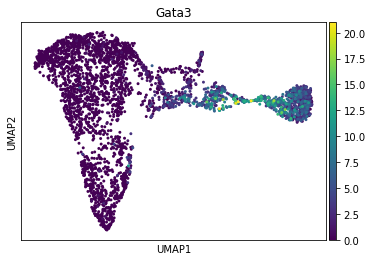

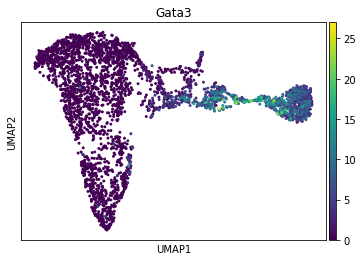

In [182]:
sc.pl.umap(adata, color='Gata3',layer='counts')
sc.pl.umap(ldata, color='Gata3',layer='matrix')

In [224]:
ldata.write("220516-ABM.velo.h5ad")

In [225]:
adata.write_h5ad("220516-ABM.h5ad")

# run alra imputation (in R kernel)

In [3]:
# solution from https://theislab.github.io/scanpy-in-R
library(reticulate)
sc <- import("scanpy")
adata <- sc$read_h5ad("/home/csj/mywork/ilc/220409-preprocessed_data/220516-ABM.h5ad")
adata

AnnData object with n_obs × n_vars = 3442 × 14521
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'pred.immgen.finepruned', 'pred.immgen.mainpruned', 'S_score', 'G2M_score', 'phase', 'ann0608'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ann0608_colors', 'leiden', 'neighbors', 'pca', 'phase_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_dca', 'normalized', 'normalized_dca', 'normalized_magic', 'scaled', 'scaled_dca'
    obsp: 'connectivities', 'distances'

In [8]:
exprs <- t(adata$layers[['normalized']])
colnames(exprs) <- adata$obs_names$to_list()
rownames(exprs) <- adata$var_names$to_list()

# Create the Seurat object
seurat <- CreateSeuratObject(exprs,min.features = 0,min.features = 0)
# Set the expression assay
seurat <- SetAssayData(seurat, "data", exprs)
# Add observation metadata
seurat <- AddMetaData(seurat, adata$obs)
# Add embedding
embedding <- adata$obsm["X_umap"]
rownames(embedding) <- adata$obs_names$to_list()
colnames(embedding) <- c("umap_1", "umap_2")
seurat[["umap"]] <- CreateDimReducObject(embedding, key = "umap_")

In [27]:
seurat <- FindVariableFeatures(seurat,selection.method = 'vst',nfeatures = 2000)
seurat <- RunPCA(seurat, npcs = 50, features = VariableFeatures(seurat),verbose = F)
seurat <- ScaleData(seurat, features = rownames(seurat))
seurat <- RunALRA(seurat)

Rank k = 28

Identifying non-zero values

Computing Randomized SVD

Find the 0.001000 quantile of each gene

Thresholding by the most negative value of each gene

Scaling all except for 34 columns

0.07% of the values became negative in the scaling process and were set to zero

The matrix went from 18.93% nonzero to 59.31% nonzero

Setting default assay as alra



In [30]:
seurat-> abm

In [46]:
mat.imputed <- t(as.matrix(abm@assays$alra@data))

In [50]:
write.table(mat.imputed, file='expr_mat_abm_alra.tsv', sep='\t')

In [6]:
mat_alra = pd.read_csv('./expr_mat_abm_alra.tsv',sep='\t')

In [4]:
adata= sc.read_h5ad('./220516-ABM.h5ad')

In [7]:
adata.layers['normalized_alra'] = copy.copy(mat_alra.to_numpy().copy())

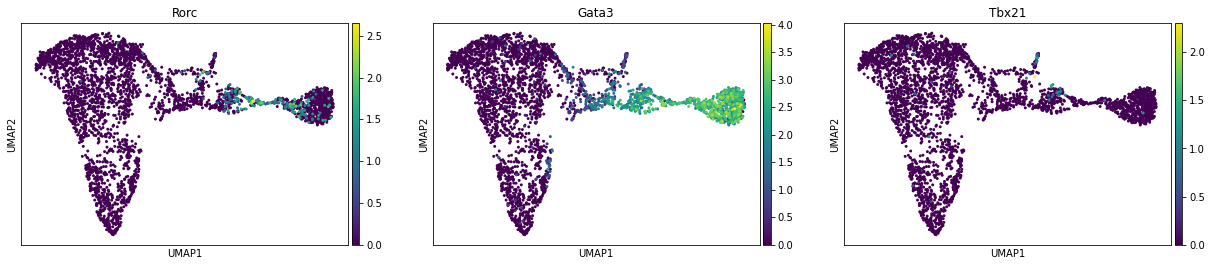

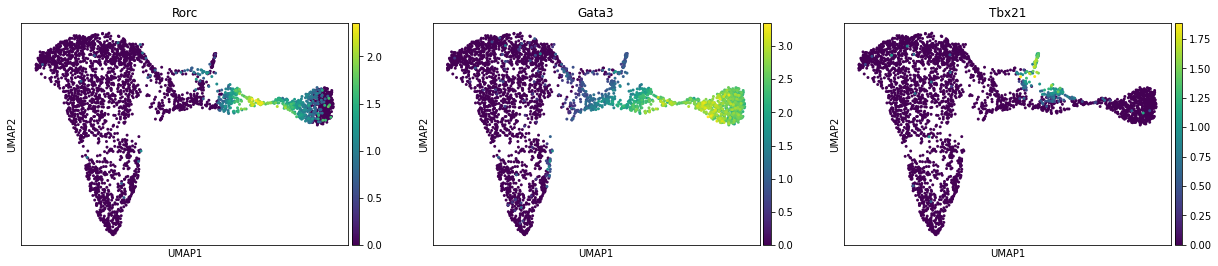

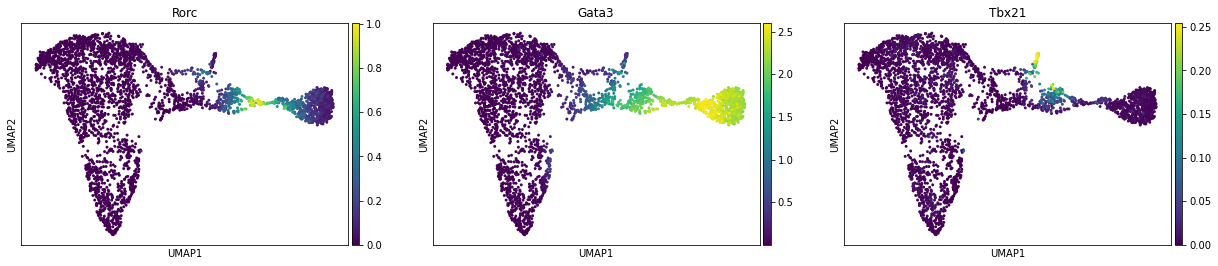

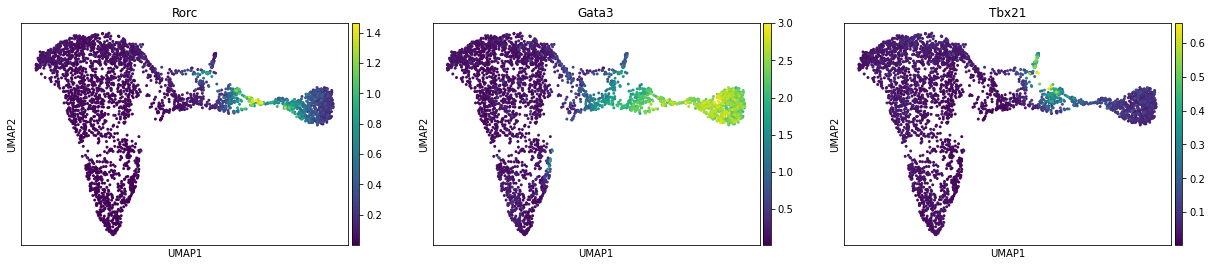

In [8]:
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'])
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'], layer='normalized_alra')
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'], layer='normalized_magic')
sc.pl.umap(adata, color=['Rorc','Gata3','Tbx21'], layer='normalized_dca')

In [9]:
adata.write_h5ad("220516-ABM.h5ad")